In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import pickle
import matplotlib.pyplot as plt
from random import randint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGES= pickle.load(open(DATA_PATH+"IMAGES.pkl", "rb"))
MASKS= pickle.load(open(DATA_PATH+"MASKS.pkl", "rb"))

In [ ]:
print(IMAGES.dtype, MASKS.dtype)

uint8 int64


In [ ]:
#use 70 percent of all data for train and keep the rest for testing and validation
from sklearn.model_selection import train_test_split
X, test_data_X, Y, test_data_y= train_test_split(IMAGES, MASKS, test_size= 0.3, random_state= 42)

In [ ]:
#use half of the test data for testing and the remaining for validation
from sklearn.model_selection import train_test_split
test_images, val_images, test_masks, val_masks= train_test_split(test_data_X, test_data_y, test_size= 0.5, random_state= 42)

In [ ]:
print(X.shape, Y.shape, test_images.shape, test_masks.shape, val_images.shape, val_masks.shape)

(140, 320, 320, 3) (140, 320, 320) (30, 320, 320, 3) (30, 320, 320) (30, 320, 320, 3) (30, 320, 320)


In [ ]:
import albumentations as A
import random
import skimage.io

In [ ]:
transform = A.Compose([   
    A.Rotate(p=0.3),
    A.Flip(p= 0.3),
    
    A.Blur(p= 0.3),
    
    A.GaussNoise(p= 0.3),

    A.RGBShift(p= 0.3),
    A.HueSaturationValue(p= 0.3)
])

"""A.RandomContrast(p=0.3), A.HueSaturationValue(p=0.3), A.RandomRotate90(p =0.3), A.Transpose(p= 0.3), A.Flip(p=0.3)"""

'A.RandomContrast(p=0.3), A.HueSaturationValue(p=0.3), A.RandomRotate90(p =0.3), A.Transpose(p= 0.3), A.Flip(p=0.3)'

In [ ]:
images_to_generate= 840

In [ ]:
i=1

augmented_images= []
augmented_masks= []

while (i<= images_to_generate):
  number= random.randint(0, len(X)-1)
  image= X[number]
  mask= Y[number]
  
  #original_image= io.imread(image)
  #original_mask= io.imread()

  augmented= transform(image= image, mask=mask)
  transformed_image= augmented["image"]
  transformed_mask= augmented["mask"]

  augmented_images.append(transformed_image)
  augmented_masks.append(transformed_mask)
  i= i+1

In [ ]:
print(np.unique(augmented_masks), np.unique(test_masks), np.unique(val_masks))

[0 1 2] [0 1 2] [0 1 2]


In [ ]:
pickle.dump(np.array(augmented_images), open(DATA_PATH+"augmented_images.pkl", "wb"))
pickle.dump(np.array(augmented_masks), open(DATA_PATH+"augmented_masks.pkl", "wb"))

In [ ]:
pickle.dump(test_images, open(DATA_PATH+"test_images.pkl", "wb"))
pickle.dump(test_masks, open(DATA_PATH+"test_masks.pkl", "wb"))

In [ ]:
pickle.dump(val_images, open(DATA_PATH+"val_images.pkl", "wb"))
pickle.dump(val_masks, open(DATA_PATH+"val_masks.pkl", "wb"))

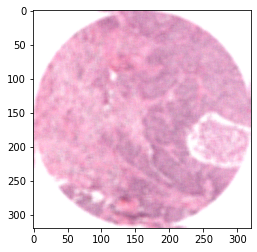

In [ ]:
p= randint(0, 799)
plt.imshow(augmented_images[p])

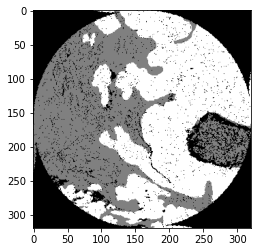

In [ ]:
plt.imshow(augmented_masks[p], cmap="gray")

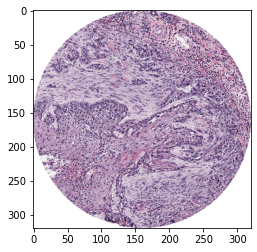

In [ ]:
g= randint(0, 19)
plt.imshow(test_images[g])

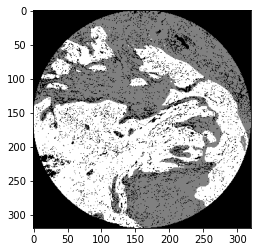

In [ ]:
plt.imshow(test_masks[g], cmap="gray")

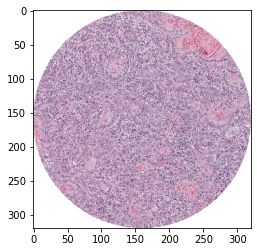

In [ ]:
h= randint(0, 29)
plt.imshow(val_images[h])

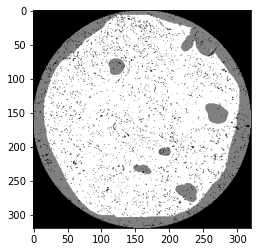

In [ ]:
plt.imshow(val_masks[h], cmap="gray")

In [ ]:
#end

## **VISUALIZATIONS ON EACH TYPE OF AUGMENTATION**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import pickle
import matplotlib.pyplot as plt
from random import randint
import albumentations as A
import random
import skimage.io

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGES= pickle.load(open(DATA_PATH+"IMAGES.pkl", "rb"))
MASKS= pickle.load(open(DATA_PATH+"MASKS.pkl", "rb"))

In [ ]:
def visualize_augmentation(aug, X, Y):
  transform = A.Compose([ aug(p= 1.0)])

  
  number= 60#random.randint(0, IMAGES.shape[0])
  #number= 60
  image= X[number]
  mask= Y[number]
  
  augmented= transform(image= image, mask=mask)
  transformed_image= augmented["image"]
  transformed_mask= augmented["mask"]

  plt.subplot(1,4,1)
  plt.imshow(X[number])
  plt.axis('off')

  plt.subplot(1,4,2)
  plt.imshow(transformed_image)
  plt.axis('off')

  plt.subplot(1,4,3)
  plt.imshow(Y[number], cmap= "gray")
  plt.axis('off')

  plt.subplot(1,4,4)
  plt.imshow(transformed_mask, cmap= "gray")
  plt.axis('off')

  return [X, transformed_image, Y, transformed_mask]

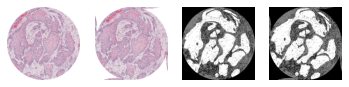

In [ ]:
rotate= visualize_augmentation(A.Rotate, IMAGES, MASKS)

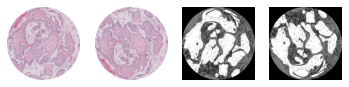

In [ ]:
flip= visualize_augmentation(A.Flip, IMAGES, MASKS)

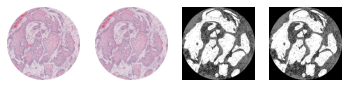

In [ ]:
blur= visualize_augmentation(A.Blur, IMAGES, MASKS)

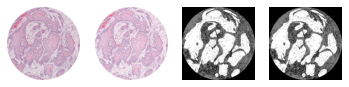

In [ ]:
gaussian_noise= visualize_augmentation(A.GaussNoise, IMAGES, MASKS)

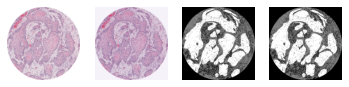

In [ ]:
rgb= visualize_augmentation(A.RGBShift, IMAGES, MASKS)

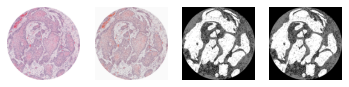

In [ ]:
hsv= visualize_augmentation(A.HueSaturationValue, IMAGES, MASKS)